# 教養としてのアルゴリズムとデータ構造

* 以下の各問について、問の次（もしくはその次）にあるコードセルに解答すること。
    * 特に指定がある場合を除いて複数のセルに分けて解答してはならない。
* 全ての解答を終えた後に必ずリスタートを実行し、上のセルから順番に実行して各解答が正しく動くことを確認すること。
 * ただし、ローカル環境で解答する場合、 `!wget...` の記載のあるセルは実行しなくてよい。 
* 提出にあたっては、各当該のセルに解答のコードを記入し、それを実行した結果を表示させた後に、保存したこのファイルをITC-LMS経由で提出すること。
* 解答のコードには適宜コメントを入れること。
* 受講者間の協力は原則許可しない。
* 解答がコピペと判断された場合、その解答（コピペ元も含めて）は0点となる可能性があるので注意すること。
* 特に指定がない限りモジュールを用いて解答してはならない。


<b><font color="red">
各問に解答するにあたり、以下の点に注意して下さい。

1. 隣接リストは授業で配布したスライド (03_Tree.ppt, 14ページ) の形式に従うものとします。
 * 例えば、`[[1,2,3], [4, 5], [6, 7], [], [8, 9, 10], [11], [12, 13], [], [], [], [], [], [], []]` の様な値です。
2. 解答するのに `networkx` を使用してはいけません。
3. `collections`モジュールの `deque` は使用可能です。
</font></b>

* ローカル環境で行う場合、課題によってはデータを別にダウンロードする必要があります。
* Colaboratoryを利用して課題を行う場合には、最初に以下のセルを実行して下さい。

In [ ]:
!wget https://drive.google.com/uc?id=1LqbhtR_i9vKjQ46LuNND2emnOFVuJYuq -O ex3_data.zip
!unzip ex3_data.zip
!wget https://drive.google.com/uc?id=1f5tjyfqDgcoHYyqedfhRKrmZ-eOGivX7 -O utaadevalcpx.zip
!unzip utaadevalcpx.zip

# 第3回本課題

In [3]:
str_exfilename = "ex3.ipynb" # ファイル名を変更している場合、ここをその名前に変更する必要があります（ローカル環境のみ/Colab環境では使用しません

## 準備：FIFOキュー

FIFOキューをクラスを用いて実現します。

具体的には、FIFOキューを実現するクラス `FIFOClass` は次の3つのメソッドを持ちます。

1. メソッド `enqueue` は `item1` を引数に取り、FIFOキューの最後尾に `item1` の値を格納する。
2. メソッド `dequeue` は FIFOキューの先頭に格納されている値を返り値として返す（返り値の値はキューから取り除く）。
3. メソッド `length` はFIFOキューに格納されている要素の数を返します。

以下のセルを実行して下さい。

In [4]:
#FIFOキュー
class FIFOClass:
    def __init__(self): # 初期化
        self.list_data = []
    def enqueue(self, item1): # 要素を最後尾に格納する
        self.list_data.append(item1)
    def dequeue(self):# 格納されている先頭の要素を取り出す
        return self.list_data.pop(0)
    def length(self): # リストの長さを返す
        return len(self.list_data)

キューが空の場合はエラーが出ます。それが気になる人は以下のセルの定義を利用して下さい。以下の定義では空の場合には `None` を返します。

In [5]:
#FIFOキュー
class FIFOClass:
    def __init__(self): # 初期化
        self.list_data = []
    def enqueue(self, item1): # 要素を最後尾に格納する
        self.list_data.append(item1)
    def dequeue(self):
        try: # 要素が格納されている場合は先頭の要素を取り出す
            return self.list_data.pop(0)
        except IndexError: # 要素が存在しない場合は、Noneを返す
            return None
    def length(self): # リストの長さを返す
        return len(self.list_data)

`FIFOClass` を定義した、FIFOキューの使い方を確認してみましょう。下記では `FIFO1` というオブジェクト（内のリスト `list_data` ）がFIFOキューのルールに従ってデータを保持することになります。

クラスを扱ったことのない人も身構える必要はありません。`FIFOClass` はリストと同じ様な使い方をすることが出来ます。

FIFOキューを使う際には、最初に初期化します。

In [6]:
#FIFOキューを初期化
FIFO1 = FIFOClass()

FIFOキューは、データ（要素）を順序付けて一時的に保持する為のデータ構造ですから、とりあえず保持したい値（この授業では主に木構造などの頂点の名前）を追加します。

`10` という値をメソッド `enqueue` を使って追加します。

In [7]:
#10をFIFOキューに追加
FIFO1.enqueue(10)

FIFOキューの中身は `オブジェクトの名前.list_data` で確認できます。

In [8]:
print("FIFOキューの状態:", FIFO1.list_data, " 要素数：", FIFO1.length())

FIFOキューの状態: [10]  要素数： 1


`10` という値が格納されています。

更に、`20` と `30` という2つの値を格納してみます。

In [9]:
#20をFIFOキューに追加
FIFO1.enqueue(20)
#30をFIFOキューに追加
FIFO1.enqueue(30)

FIFOキューの中身を確認してみます。

In [10]:
print("FIFOキューの状態:", FIFO1.list_data, " 要素数：", FIFO1.length())

FIFOキューの状態: [10, 20, 30]  要素数： 3


`10` の後ろに `20, 30` とFIFOキューに追加した順序で値が（`[10, 20, 30]` という形で）格納されていることが確認できるはずです。

では、次にFIFOキューからメソッド `dequeue` を使って値を取り出してみます。

In [11]:
#値の取り出し
val1 = FIFO1.dequeue()
#取り出した値とFIFOキューの状態を確認してみる
print("FIFOキューから取り出した値:", val1, " FIFOキューの状態:", FIFO1.list_data, " 要素数：", FIFO1.length())

FIFOキューから取り出した値: 10  FIFOキューの状態: [20, 30]  要素数： 2


最初に入れた値 `10` が取り出されて `val` という変数に代入され、FIFOキューは `[20, 30]` という状態になっていることが確認できるはずです。

この様にFIFOキューは値を取り出す際には、常に現在保持している値の中で一番最初に入れた値（リストの先頭）を取り出すことになっており、保存してある値から自由に値を取り出すことは出来なくなっています。

In [12]:
#100をFIFOキューに追加
FIFO1.enqueue(100)
print("FIFOキューの状態:", FIFO1.list_data, " 要素数：", FIFO1.length())
#90をFIFOキューに追加
FIFO1.enqueue(90)
print("FIFOキューの状態:", FIFO1.list_data, " 要素数：", FIFO1.length())
#値の取り出し
val1 = FIFO1.dequeue()
print("FIFOキューから取り出した値:", val1, " FIFOキューの状態:", FIFO1.list_data, " 要素数：", FIFO1.length())
#値の取り出し
val1 = FIFO1.dequeue()
print("FIFOキューから取り出した値:", val1, " FIFOキューの状態:", FIFO1.list_data, " 要素数：", FIFO1.length())
#値の取り出し
val1 = FIFO1.dequeue()
print("FIFOキューから取り出した値:", val1, " FIFOキューの状態:", FIFO1.list_data, " 要素数：", FIFO1.length())
#値の取り出し
val1 = FIFO1.dequeue()
print("FIFOキューから取り出した値:", val1, " FIFOキューの状態:", FIFO1.list_data, " 要素数：", FIFO1.length())

FIFOキューの状態: [20, 30, 100]  要素数： 3
FIFOキューの状態: [20, 30, 100, 90]  要素数： 4
FIFOキューから取り出した値: 20  FIFOキューの状態: [30, 100, 90]  要素数： 3
FIFOキューから取り出した値: 30  FIFOキューの状態: [100, 90]  要素数： 2
FIFOキューから取り出した値: 100  FIFOキューの状態: [90]  要素数： 1
FIFOキューから取り出した値: 90  FIFOキューの状態: []  要素数： 0


この `FIFOClass` によるFIFOキューを使って次の問を解いてみて下さい。

なお、本来FIFOキューの要素の格納 (`enqueue`) と取り出し (`dequeue`)の計算量は $O(1)$ となる様に構成すべきです。しかし、 `FIFOClass` は要素の取り出しに取り出しに popメソッドを用いている為、実際はFIFOキューに格納される最大の要素数を $n$ とした場合、$O(n)$ の計算量がかかります。

計算量が $O(1)$ になる様にしたい人は、下記のセルの `FIFOClass` を使用する様にして下さい。この `FIFOClass` ではcollectionsモジュールの`collections.deque` を使用しています。`collections.deque` について詳しくは note_deque.ipynb を参照して下さい


In [13]:
#FIFOキュー
import collections
class FIFOClass:
    def __init__(self):
        self.list_data = collections.deque()
    def enqueue(self, item1):
        self.list_data.append(item1)
    def dequeue(self):
        try:
            return self.list_data.popleft()
        except IndexError:
            return None
    def length(self):
        return len(self.list_data)

## 3. 幅優先探索を用いた訪問順の取得

木構造 $T$ を表す隣接リスト `list_adjlist` が引数として与えられたとき、$T$ に対して根から幅優先探索を行った際に、$T$ の各点を訪問する順序を表すリスト `list_node` を返す関数 `BFSInPreorder` を作成して下さい。以下の点に注意して解答して下さい。

1. 各点は `0` 以上の整数で表されます。
2. 根を表す番号は `0` です。
3. 訪問する順序を表すリスト`list_node` には、幅優先探索を行った際に訪問した順序（FIFOキューから取り出した順序）で点の名前を格納します。

この問が分からない場合、drill_03_Tree.ipynb の練習問題をまず解いてみて下さい。


以下のセルの `...` のところを書き換えて解答して下さい。

In [14]:
### この行のコメントを改変してはいけません %3-3% ### 
#解答用セル
import collections
class FIFOClass:
    def __init__(self):
        self.list_data = collections.deque()
    def enqueue(self, item1):
        self.list_data.append(item1)
    def dequeue(self):
        try:
            return self.list_data.popleft()
        except IndexError:
            return None
    def length(self):
        return len(self.list_data)


def BFSInPreorder(list_adjlist):
    #list_nodeを初期化
    list_node = []
    #FIFOキューを初期化
    FIFO = FIFOClass()
    #根の名前(0)をFIFOキューに入れる
    FIFO.enqueue(0)
    #FIFOキューが空になるまで探索（ループ）
    while(len(FIFO.list_data) > 0):
        #FIFOキューから点node1を取り出す
        node1 = FIFO.dequeue()
        #node1をlist_nodeに追加する
        list_node.append(node1)
        #node1の子childnodeを全て処理する
        for childnode in list_adjlist[node1]:
            #node1の子childnodeをFIFOキューに入れる
            FIFO.enqueue(childnode)  
    return list_node

上のセルで解答を作成した後、以下のセルを実行し、実行結果が `True` になることを確認して下さい。

In [13]:
list_adjlist_test1=[[1, 2], [], [3, 4], [], []]
list_res1 = BFSInPreorder(list_adjlist_test1)
print(list_res1[0]==0 and set(list_res1[1:3])=={1,2} and set(list_res1[3:5])=={3,4})
list_adjlist_test2=[[5, 1], [2], [], [], [], [3, 4]]
list_res2 = BFSInPreorder(list_adjlist_test2)
print(list_res2[0]==0 and set(list_res2[1:3])=={1,5} and set(list_res2[3:6])=={2,3,4})

True
True


なお、テストで用いている木は以下の様な形になっています。

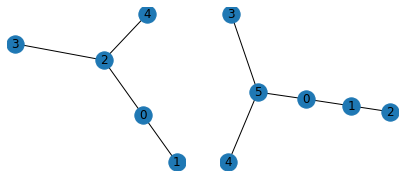

In [15]:
import networkx as nx, matplotlib.pyplot as plt
%matplotlib inline
#隣接リストをnx形式に変換（枝を加える）→描画
def drawAdjlistUsingNx(nx_tree, list_adjlist, dic_pos, axval):
    for node1 in range(0, len(list_adjlist)):
        for node2 in list_adjlist[node1]:
            nx_tree.add_edge(node1, node2)
    axval.set_axis_off()
    nx.draw_networkx(nx_tree, pos=dic_pos, ax=axval)
#2つの木を描画
fig, npar_axval = plt.subplots(1, 2, figsize=(7, 3))
#1
list_adjlist_test1=[[1, 2], [], [3, 4], [], []]; nx_tree1 = nx.Graph()
drawAdjlistUsingNx(nx_tree1, list_adjlist_test1, None, npar_axval[0])
#2
list_adjlist_test2=[[5, 1], [2], [], [], [], [3, 4]]; nx_tree2 = nx.Graph()
drawAdjlistUsingNx(nx_tree2, list_adjlist_test2, None, npar_axval[1])

以下のセルを実行すると解答セルのプログラムの計算量を自動的に評価します。
* ローカル環境で解答している人はファイルを保存してから以下のセルをそのまま実行して下さい（このファイルと同じフォルダ内に `utaadevalcpx.py` があることを確認して下さい）。
* Colaboratoryを利用している人はセル内部の `str_code_3_3  = '''...'''` の `...` に自分の解答をコピペして下さい（ファイル冒頭のデータのダウンロードを事前に行う必要があります）。
`

ただし、常に正しい計算量を求められる訳ではありません（<font color="red">正しく求められなかった場合、実際の計算量よりも計算量が少なく求まります</font>）。例えば、以下の様な内容のコードは正しく評価できないことがあります。
* 組み込み関数などの名前を別名に変更している
* 条件式の使用（例えば、for文中のif文＋`break`など）
* while文を使用する

この課題の模範解答の時間計算量は<font color="white"> $O(n)$ ですが、$O(k)$ と求まります。</font>（←白黒反転しています）  
想像（模範解答）よりも大きな計算量となっている場合、どこに問題があるのか考えてみて下さい。

正しく計算量が評価できていないと思った場合、感想などで教えて下さい。
* Pythonのバージョンが3.7より大きいと、正しく評価されない様です（Colab.は3.7です）。

In [16]:
import utaadevalcpx;dic_varinfo_3_3 = {"list_adjlist": ["list", set(), {"n"}],"list_adjlist*": ["list", set(), {"k"}],}
str_code_3_3 = '''...'''
utaadevalcpx.evaluateCpx(str_exfilename, "3-3", dic_varinfo_3_3, str_code_3_3) # str_exfilenameはファイルの冒頭で定義されています

('時間計算量：O(k), ',
 '領域計算量：O(k+n)',
 '解答のコードには適宜コメントを入れて下さい。正しくても評価者が読解できない場合は減点となる可能性があります。')

<b>問題の難易度評価：</b>
下のセルにこの問の難易度を5段階（1:簡単、2:やや簡単、3:普通、4:やや難しい、5:難しい）で評価して下さい。（次回以降の課題の難易度の調整に使います）
また、解答するのにかかった時間や感想などがあれば適宜記載して下さい。

In [17]:
#難易度（1:簡単、2:やや簡単、3:普通、4:やや難しい、5:難しい）
# 3
#感想


## 4. 家系図の探索

家系図は典型的な木構造で表すことができるデータですが、その様な木構造のデータとして与えられた家系図において一番古い先祖（根）からの親等を求める関数を設計してみましょう。

一番古い先祖からの親等は、先祖の子であれば 1（親等）、孫であれば 2（親等）、ひ孫であれば 3（親等）、…となります（先祖自身は 0 親等とみなします）。

そこで家系図を表す隣接リスト `list_adjlist` が引数として与えられたとき、各人物（点）の親等を格納したリスト `list_D` を返す関数  `BFSForFamiliyTree` を作成して下さい。以下の点に注意して解答して下さい。

1. 各点は `0` 以上の整数で表されます。
2. 先祖（根）を表す番号は `0` です。
3. `list_D` の `i` 番目の要素 `list_D[i]` は、先祖から点 `i` までの親等を格納します。
4. （ヒント→）<font color="white">根 (`0`) から根への親等は `0` で、根の子への親等は `1` 、更にその子への親等は `2` です。つまり、ある点 $v$ への親等 (`list_D[` $v$ `]`) が $x$ であるならば、その点の子 $u$ への親等 (`list_D[` $u$ `]`) は `list_D[` $v$ `]` $+1$、すなわち、$x+1$ になります。</font>


以下のセルの `...` のところを書き換えて解答して下さい。

In [18]:
### この行のコメントを改変してはいけません %3-4% ### 
#解答用セル
import collections
class FIFOClass:
    def __init__(self):
        self.list_data = collections.deque()
    def enqueue(self, item1):
        self.list_data.append(item1)
    def dequeue(self):
        try:
            return self.list_data.popleft()
        except IndexError:
            return None
    def length(self):
        return len(self.list_data)

def BFSForFamilyTree(list_adjlist):
    #世代数を格納するリストlist_Dを初期化
    list_D = [None] * len(list_adjlist)
    #FIFOキューを初期化
    FIFO = FIFOClass()
    #根の名前(0)をFIFOキューに入れる
    FIFO.enqueue(0)
    #根の世代数は0
    list_D[0] = 0
    #FIFOキューが空になるまで探索（ループ）
    while(len(FIFO.list_data) > 0):
        # FIFOキューから点node1を取り出す
        node1 = FIFO.dequeue()
        #node1の子childnodeを全て処理する
        for childnode in list_adjlist[node1]:
            #node1の子childnodeをFIFOキューに入れる
            FIFO.enqueue(childnode)    
            #childnodeの世代はnode1の一世代下
            list_D[childnode] = list_D[node1] + 1
    #list_Dを返す
    return list_D

上のセルで解答を作成した後、以下のセルを実行し、実行結果が `True` になることを確認して下さい。

In [26]:
list_adjlist_test1=[[1, 2], [], [3, 4], [], []]
list_D1=BFSForFamilyTree(list_adjlist_test1);
print(list_D1==[0, 1, 1, 2, 2])
list_adjlist_test2=[[1, 2, 3], [4, 5], [6, 7, 8, 9], [], [], [10], [], [], [], [], []]
list_D2=BFSForFamilyTree(list_adjlist_test2);
print(list_D2==[0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3])
list_adjlist_test3=[[3, 7, 9], [], [], [6, 2], [5, 1], [], [], [4], [], [8]]
list_D3=BFSForFamilyTree(list_adjlist_test3);
print(list_D3==[0, 3, 2, 1, 2, 3, 2, 1, 2, 1])

True
True
True


なお、テストで用いている木は以下の様な形になっています。

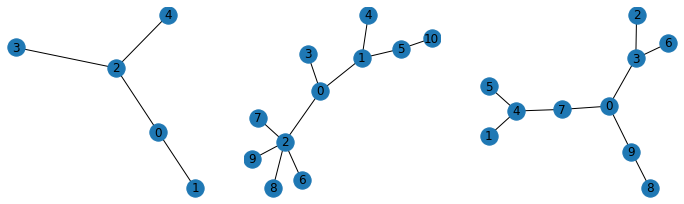

In [19]:
import networkx as nx, matplotlib.pyplot as plt
%matplotlib inline
#隣接リストをnx形式に変換（枝を加える）→描画
def drawAdjlistUsingNx(nx_tree, list_adjlist, dic_pos, axval):
    for node1 in range(0, len(list_adjlist)):
        for node2 in list_adjlist[node1]:
            nx_tree.add_edge(node1, node2)
    axval.set_axis_off()
    nx.draw_networkx(nx_tree, pos=dic_pos, ax=axval)
#3つの木を描画
fig, npar_axval = plt.subplots(1, 3, figsize=(12, 3.5))
#1
list_adjlist_test1=[[1, 2], [], [3, 4], [], []];nx_tree1 = nx.Graph()
drawAdjlistUsingNx(nx_tree1, list_adjlist_test1, None, npar_axval[0])
#2
list_adjlist_test2=[[1, 2, 3], [4, 5], [6, 7, 8, 9], [], [], [10], [], [], [], [], []];nx_tree2 = nx.Graph()
drawAdjlistUsingNx(nx_tree2, list_adjlist_test2, None, npar_axval[1])
#3
list_adjlist_test3=[[3, 7, 9], [], [], [6, 2], [5, 1], [], [], [4], [], [8]];nx_tree3 = nx.Graph()
drawAdjlistUsingNx(nx_tree3, list_adjlist_test3, None, npar_axval[2])

先祖からの各点までの親等の値は、先祖から各点までの最短距離（先祖から各点にたどり着くまでに存在する枝の数）に等しくなります。

実は `networkx` を用いて木構造の最短距離を求めることが出来ます。下のセルのテストでは `networkx` の最短距離の結果と `BFSForFamilyTree` の結果を比較しています。`True` になることを確認して下さい。

In [20]:
import random, networkx as nx
#ランダムに木を作成する
def constructRandomTree(nodenum, maxchildnum):
    random.seed(a=0)
    #隣接リスト
    list_tree_adjlist = [0] * nodenum
    #FIFOを使う
    FIFO = FIFOClass()
    #根は0
    nodecnt = 0
    FIFO.enqueue(nodecnt)
    nodecnt += 1
    while(len(FIFO.list_data) > 0):
        #新しく子供を作成する点
        node1 = FIFO.dequeue()
        #点node1の子供数を決定
        childnum = random.randint(0, maxchildnum)
        #キューに何も入ってない場合、必ず子供は1つ以上
        if len(FIFO.list_data) == 0 and childnum == 0:
            childnum = random.randint(1, maxchildnum)
        list_tree_adjlist[node1] = []
        for adjnode in range(childnum):
            list_tree_adjlist[node1].append(nodecnt)
            FIFO.enqueue(nodecnt)
            nodecnt += 1
            #点の数が指定数に到達したら終了
            if nodecnt == nodenum:
                break
        #点の数が指定数に到達したら終了
        if nodecnt == nodenum:
            #子供がない点のリストを空にしておく
            node1 += 1
            while(node1 < nodenum):
                list_tree_adjlist[node1] = []
                node1 += 1
            break
    return list_tree_adjlist
def getNXGraph(nx_g1, list_adjlist):
    for node1, list_adj in enumerate(list_adjlist):
        for node2 in list_adj:
            nx_g1.add_edge(node1, node2)
nx_tree3 = nx.DiGraph()
nodenum_test3 = 10000
maxchildnum_test3 = 5
list_adjlist_test3 = constructRandomTree(nodenum_test3, maxchildnum_test3)
getNXGraph(nx_tree3, list_adjlist_test3)
initnode_test3 = 0
dic_nxres3 = nx.shortest_path(nx_tree3, source=initnode_test3)
list_Dnx3 = [len(dic_nxres3[i])-1 for i in range(nodenum_test3)]
list_D3 = BFSForFamilyTree(list_adjlist_test3)
print(list_Dnx3 == list_D3)

True


以下のセルで両者の実行時間を比較してみて下さい。上記で作成する木では、一般的な実装による模範解答と比較したところ `networkx` と同等以上の速さで最短距離を求めることが出来る様です。

In [21]:
%%timeit -r 10 -n 10
nx.shortest_path(nx_tree3, source=initnode_test3)

11.3 ms ± 463 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [22]:
%%timeit -r 10 -n 10
BFSForFamilyTree(list_adjlist_test3)

5.44 ms ± 140 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


以下のセルを実行すると解答セルのプログラムの計算量を自動的に評価します。
* ローカル環境で解答している人はファイルを保存してから以下のセルをそのまま実行して下さい（このファイルと同じフォルダ内に `utaadevalcpx.py` があることを確認して下さい）。
* Colaboratoryを利用している人はセル内部の `str_code_3_4  = '''...'''` の `...` に自分の解答をコピペして下さい（ファイル冒頭のデータのダウンロードを事前に行う必要があります）。
`

ただし、常に正しい計算量を求められる訳ではありません（<font color="red">正しく求められなかった場合、実際の計算量よりも計算量が少なく求まります</font>）。例えば、以下の様な内容のコードは正しく評価できないことがあります。
* 組み込み関数などの名前を別名に変更している
* 条件式の使用（例えば、for文中のif文＋`break`など）
* while文を使用する

この課題の模範解答の時間計算量は<font color="white"> $O(n)$ ですが、$O(k+n)$、もしくは $O(k)$ と求まります。</font>（←白黒反転しています）  
想像（模範解答）よりも大きな計算量となっている場合、どこに問題があるのか考えてみて下さい。

正しく計算量が評価できていないと思った場合、感想などで教えて下さい。
* Pythonのバージョンが3.7より大きいと、正しく評価されない様です（Colab.は3.7です）。

In [23]:
import utaadevalcpx;dic_varinfo_3_4 = {"list_adjlist": ["list", set(), {"n"}],"list_adjlist*": ["list", set(), {"k"}],}
str_code_3_4 = '''...'''
utaadevalcpx.evaluateCpx(str_exfilename, "3-4", dic_varinfo_3_4, str_code_3_4) # str_exfilenameはファイルの冒頭で定義されています

SyntaxError: invalid syntax (<string>, line 2)

`ex3_data_wikipedia_TokugawaFamilyTree.json`, `ex3_data_wikipedia_TokugawaFamilyTreeInfo.json` にウィキペディア（ https://ja.wikipedia.org ）のデータから作成した徳川家康とその子孫からなる家系図を表す木構造によるデータを用意しました。

これを使って最初の将軍である徳川家康 (<a href='https://ja.wikipedia.org/wiki/%E5%BE%B3%E5%B7%9D%E5%AE%B6%E5%BA%B7'>日</a>、<a href='https://en.wikipedia.org/wiki/Tokugawa_Ieyasu'>Eng</a>) と最後の将軍である徳川慶喜 (<a href='https://ja.wikipedia.org/wiki/%E5%BE%B3%E5%B7%9D%E6%85%B6%E5%96%9C'>日</a>、<a href='https://en.wikipedia.org/wiki/Tokugawa_Yoshinobu'>Eng</a>) の親等を調べてみましょう（日本史に全く興味がない人は何のことか分からない話でごめんなさい）。

In [24]:
import json
if 'list_adjlist_Tok' not in globals(): 
    # 隣接リスト
    with open("ex3_data_wikipedia_list_TokugawaFamilyTree.json", "r", encoding="utf-8") as f:
        list_adjlist_Tok = json.load(f)
    # 人物情報
    with open("ex3_data_wikipedia_list_TokugawaFamilyTreeDInfo.json", "r", encoding="utf-8") as f:
        list_TokInfo = json.load(f)
list_D_Tok = BFSForFamilyTree(list_adjlist_Tok)
print(list_TokInfo[440][0:2], list_D_Tok[440]) #徳川慶喜

[440, '徳川慶喜'] 10


最後に徳川家の家系図を描画してみます。緑の点が将軍になった人物です。

[[0, '徳川家康'], [6, '徳川秀忠'], [32, '徳川家光'], [68, '徳川家綱'], [71, '徳川綱吉'], [83, '徳川吉宗'], [120, '徳川家宣'], [133, '徳川家重'], [178, '徳川家継'], [187, '徳川家治'], [262, '徳川家斉'], [315, '徳川家慶'], [370, '徳川家定'], [372, '徳川家茂'], [440, '徳川慶喜']]


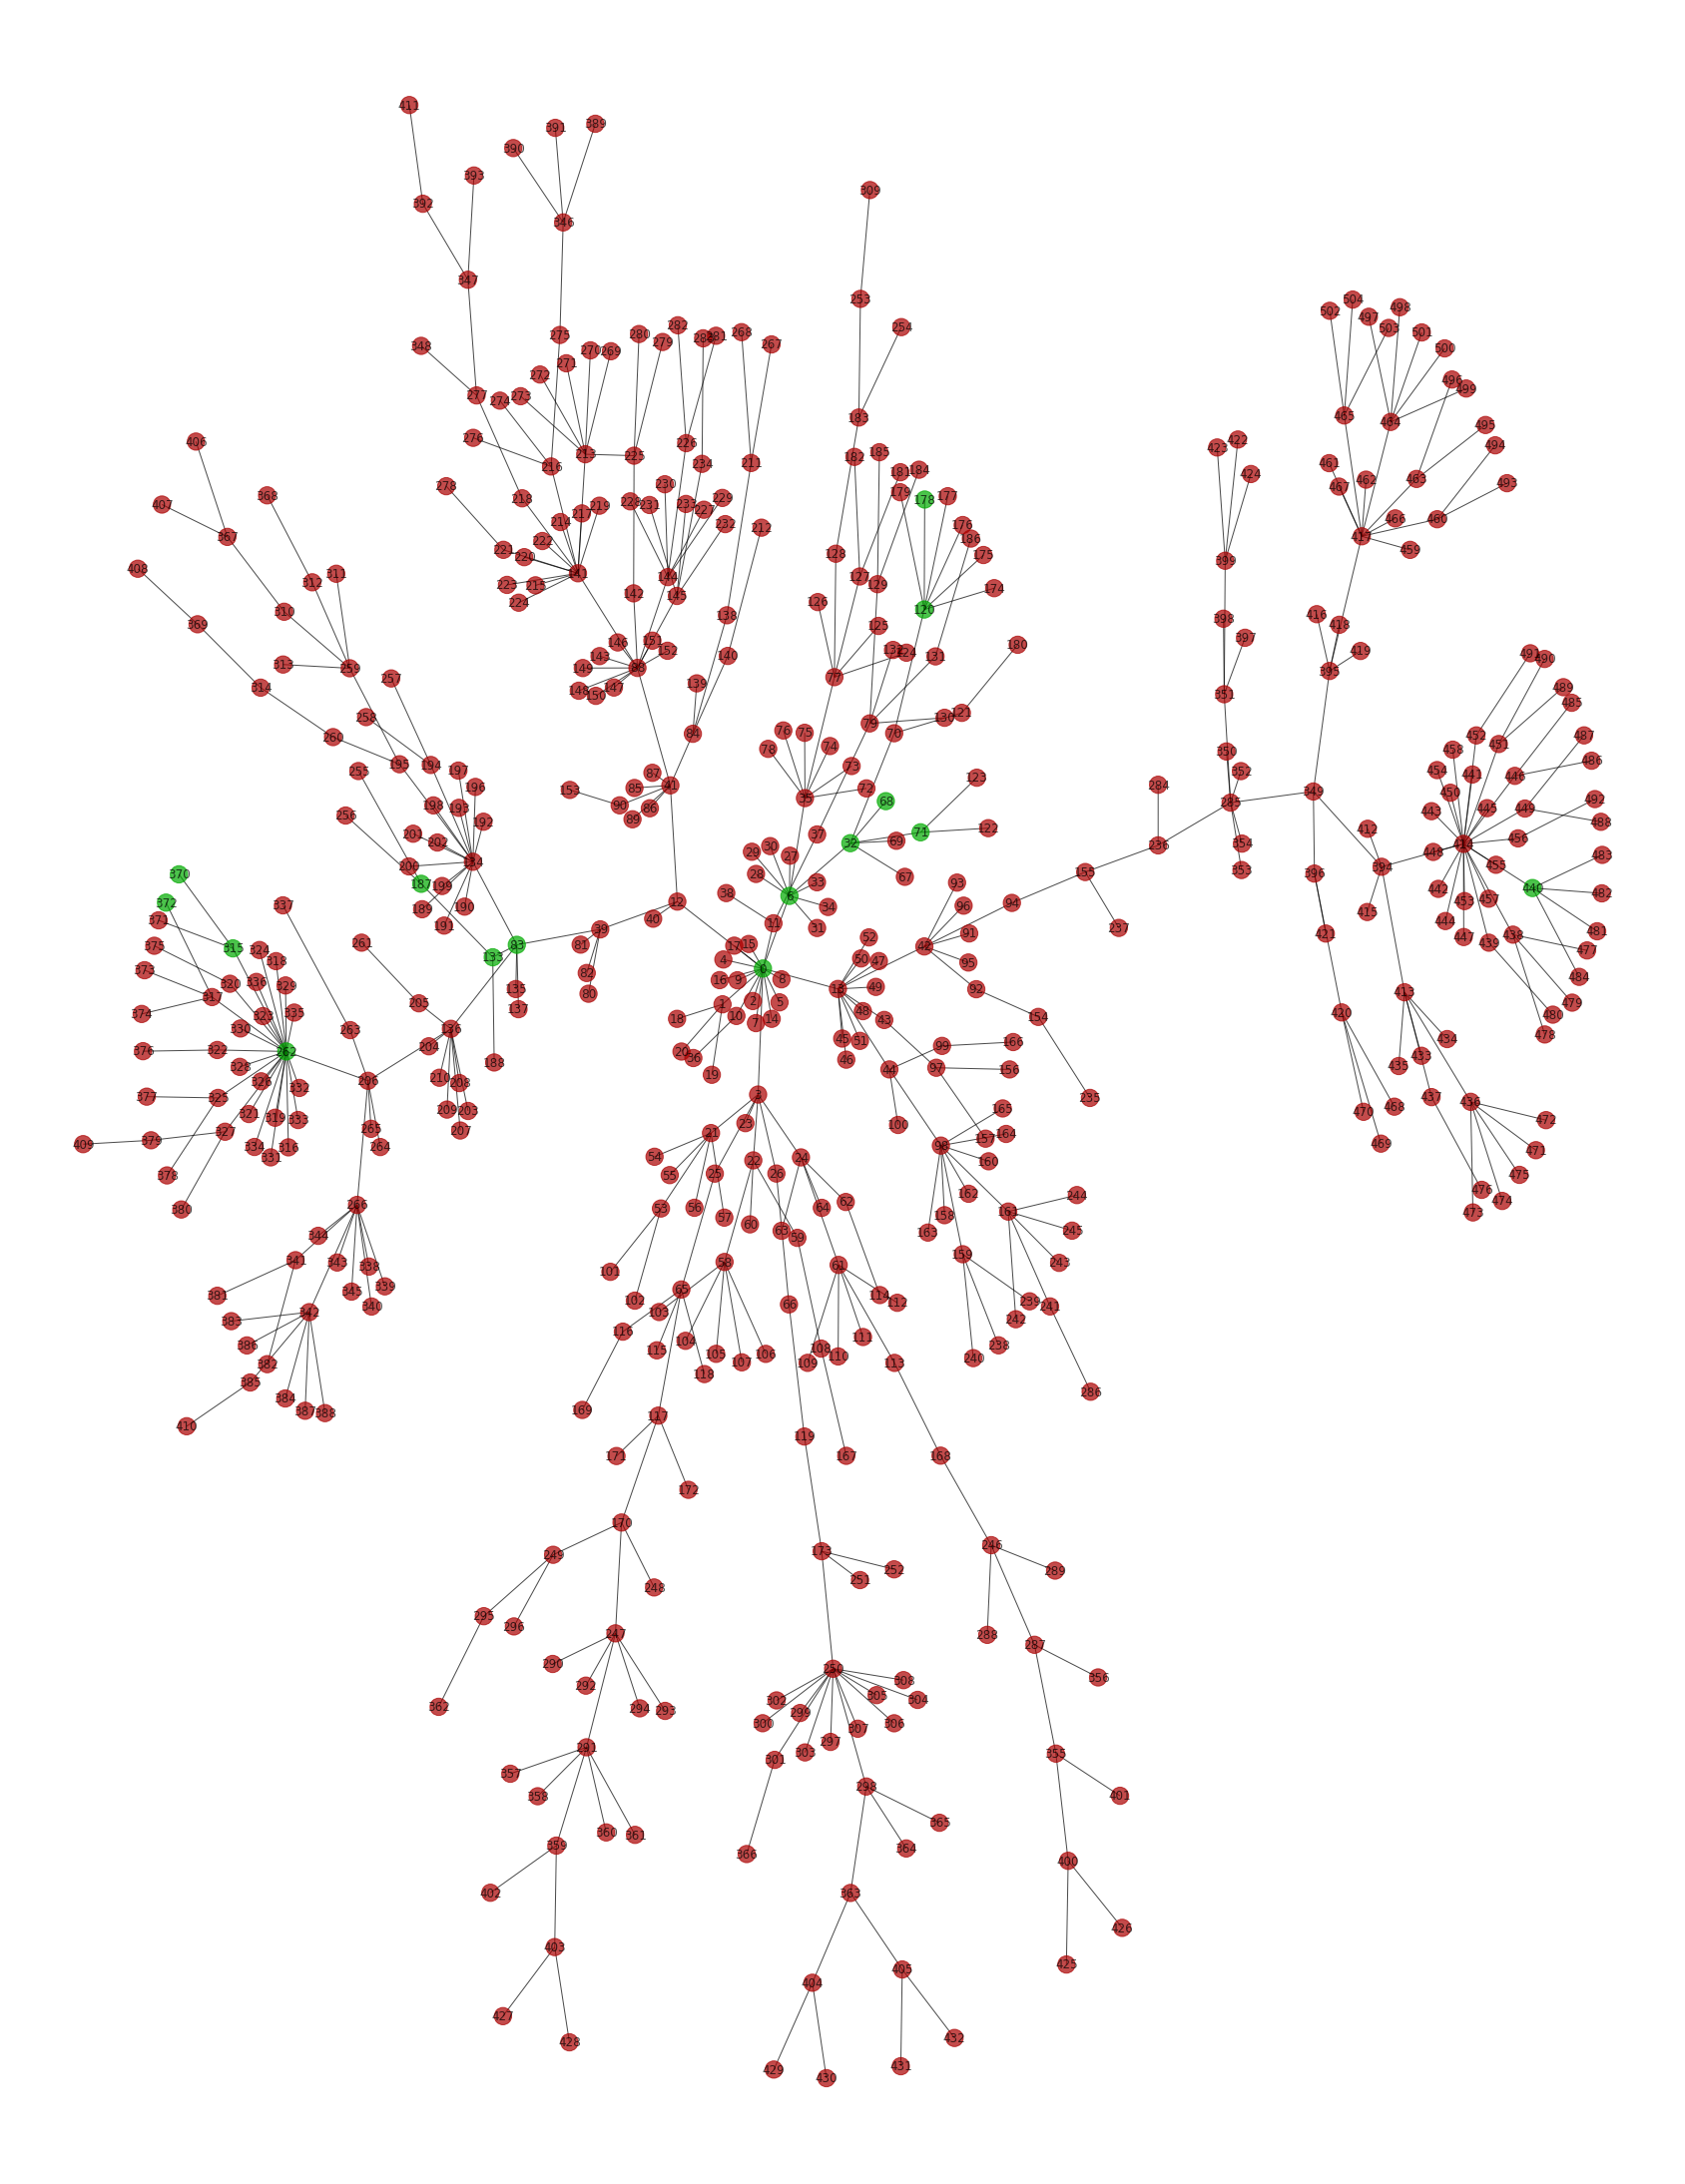

In [25]:
import networkx as nx, matplotlib.pyplot as plt, json
%matplotlib inline
nx_TokTree = nx.Graph()
for node1 in range(0, len(list_adjlist_Tok)):
    for node2 in list_adjlist_Tok[node1]:
        nx_TokTree.add_edge(node1, node2)
list_color = ["#aa0000"] * len(list_adjlist_Tok)
set_shogun = {"徳川家康","徳川秀忠","徳川家光","徳川家綱","徳川綱吉","徳川家宣","徳川家継","徳川吉宗","徳川家重","徳川家治","徳川家斉","徳川家慶","徳川家定","徳川家茂","徳川慶喜"}
list_shogun = []
for index1 in range(len(list_TokInfo)):
    if list_TokInfo[index1][1] in set_shogun:#将軍を見つけた場合
        list_color[index1] = "#00aa00" #点の色を変える（緑）
        list_shogun.append([index1, list_TokInfo[index1][1]])
print(list_shogun)
plt.figure(figsize=(30, 40))
pos1 = nx.kamada_kawai_layout(nx_TokTree)
nx.draw_networkx(nx_TokTree, pos=pos1, node_color=list_color, alpha=0.7)
plt.axis('off')
plt.show();

余裕がある人は、このデータに対して `BFSInPreorder` も試してみて下さい。

In [ ]:
list_res_Tok = BFSInPreorder(list_adjlist_Tok)
for index1, name1 in list_shogun:
    print(name1, "の訪問順:", list_res_Tok[index1])

<b>問題の難易度評価：</b>
下のセルにこの問の難易度を5段階（1:簡単、2:やや簡単、3:普通、4:やや難しい、5:難しい）で評価して下さい。（次回以降の課題の難易度の調整に使います）
また、解答するのにかかった時間や感想などがあれば適宜記載して下さい。

In [ ]:
#難易度（1:簡単、2:やや簡単、3:普通、4:やや難しい、5:難しい）
# 4
#感想
# 計算時間の計算がうまくいきませんでした．Colaboratoryでは以下のように表示されました．
# ('時間計算量：O(kn), ',
#  '領域計算量：O(kn)',
#  '解答のコードには適宜コメントを入れて下さい。正しくても評価者が読解できない場合は減点となる可能性があります。')